<a href="https://colab.research.google.com/github/karthik018/my_ML_Learnings/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784")
X, y = mnist["data"], mnist["target"]
print(X.shape, y.shape)

(70000, 784) (70000,)


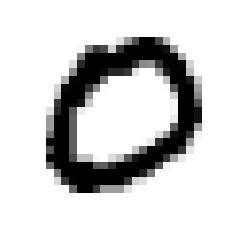

In [16]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_dig = X.iloc[6700].to_numpy()
some_dig_img = some_dig.reshape(28, 28)

plt.imshow(some_dig_img, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [21]:
import numpy as np
X_train, X_test, y_train, y_test = X[:60000].to_numpy(), X[60000:].to_numpy(), y[:60000].to_numpy(), y[60000:].to_numpy()

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

param_grid = [
      {'weights': ['uniform', 'distance'], 'n_neighbors': [3, 4, 5, 6]}
]

kn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(kn_clf, param_grid, cv=3, scoring="accuracy")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5, 6],
                          'weights': ['uniform', 'distance']}],
             scoring='accuracy')

In [30]:
grid_search.best_score_

0.9716

In [32]:
y_pred = grid_search.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score
test_score = accuracy_score(y_test, y_pred)

In [34]:
test_score

0.9714